# Load data and keep 2019 timepoint

In [3]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean02.csv')

df_covid_AP.drop(columns=['Unnamed: 0'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})
df_covid_AP[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'fully_vaccinated', 'Population_density']].head()

,NO2_annualMean,NO_annualMean,O3_annualMean,PM10_annualMean,PM2_5_annualMean,fully_vaccinated,Population_density
0,21.33097,4.689645,48.14162,25.21095,20.56858,0.688,290.118803
1,21.10792,5.591758,46.78272,22.83172,20.17655,0.688,290.118803
2,20.65600,5.372472,45.26885,20.53782,17.18541,0.688,290.118803
3,19.16632,4.376160,47.91164,21.05746,15.83933,0.688,290.118803
4,20.46666,15.755060,47.80345,24.20021,19.77463,0.688,290.118803


In [2]:
df_covid_AP.shape

(4000, 23)

In [3]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'fully_vaccinated', 'Population_density'],
      dtype='object')

In [4]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

# StandardScale features

In [5]:
df_num = df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(df_num)  # Fit scaler to feature
scaled_num = scaler.transform(df_num)  #Scale


In [7]:
df_covid_AP_2019

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,...,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k,fully_vaccinated,Population_density
0,StädteRegion Aachen,2019,8.702983,0.000000,0.743928,58.899370,8.000000,80.625130,212.635000,170.913300,...,Nordrhein-Westfalen,556631,7.046180e+08,1.834700,33902,622,6090.569875,111.743687,0.715,789.975585
1,LK Diepholz,2019,16.479730,0.006061,8.244184,51.977262,2.070819,76.564177,179.693566,162.577275,...,Niedersachsen,218072,1.989167e+09,1.279707,8752,112,4013.353388,51.359184,0.699,109.629819
2,LK Coesfeld,2019,17.933774,0.006848,9.534453,51.286576,1.789065,76.120298,179.553243,162.327283,...,Nordrhein-Westfalen,220712,1.111795e+09,1.450909,7099,103,3216.408714,46.667150,0.715,198.518661
3,LK Passau,2019,16.770445,0.006218,8.410734,51.140287,1.729388,76.026283,179.523522,162.274333,...,Bayern,193454,1.532712e+09,2.123258,18368,390,9494.763613,201.598313,0.663,126.216795
4,LK Peine,2019,16.763028,0.006214,8.367538,52.597452,2.323815,76.962751,179.819566,162.801752,...,Niedersachsen,135844,5.360006e+08,1.523207,6959,106,5122.787904,78.030682,0.699,253.440020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,SK Ludwigshafen,2019,21.671630,0.000000,9.102100,47.877540,0.000000,76.270500,204.100000,190.000000,...,Rheinland-Pfalz,172557,7.781020e+07,2.465243,13954,344,8086.603267,199.354416,0.678,2217.665507
396,LK Vorpommern-Greifswald,2019,5.494001,0.000000,0.926342,53.776740,0.000000,75.185710,168.900000,155.562500,...,Mecklenburg-Vorpommern,235773,3.800116e+09,2.437623,12184,297,5167.682474,125.968622,0.665,62.043640
397,SK Neumünster,2019,16.000772,0.005802,8.116243,51.994648,2.077911,76.575350,179.697098,162.583568,...,Schleswig-Holstein,79905,7.140224e+07,0.889996,2809,25,3515.424567,31.287153,0.725,1119.082513
398,LK Uckermark,2019,15.847196,0.005719,7.646981,52.660445,2.349512,77.003235,179.832364,162.824552,...,Brandenburg,118250,3.081478e+09,3.458038,4945,171,4181.818182,144.608879,0.617,38.374438


# Analyze distribution of features and targets

In [8]:
# keep useful features only
df_covid_AP_2019 = df_covid_AP_2019[['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [9]:
#numerical features
feature_list = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'fully_vaccinated', 'Population_density']

In [10]:
target_list = ['cases_per_100k', 'deaths_per_100k']

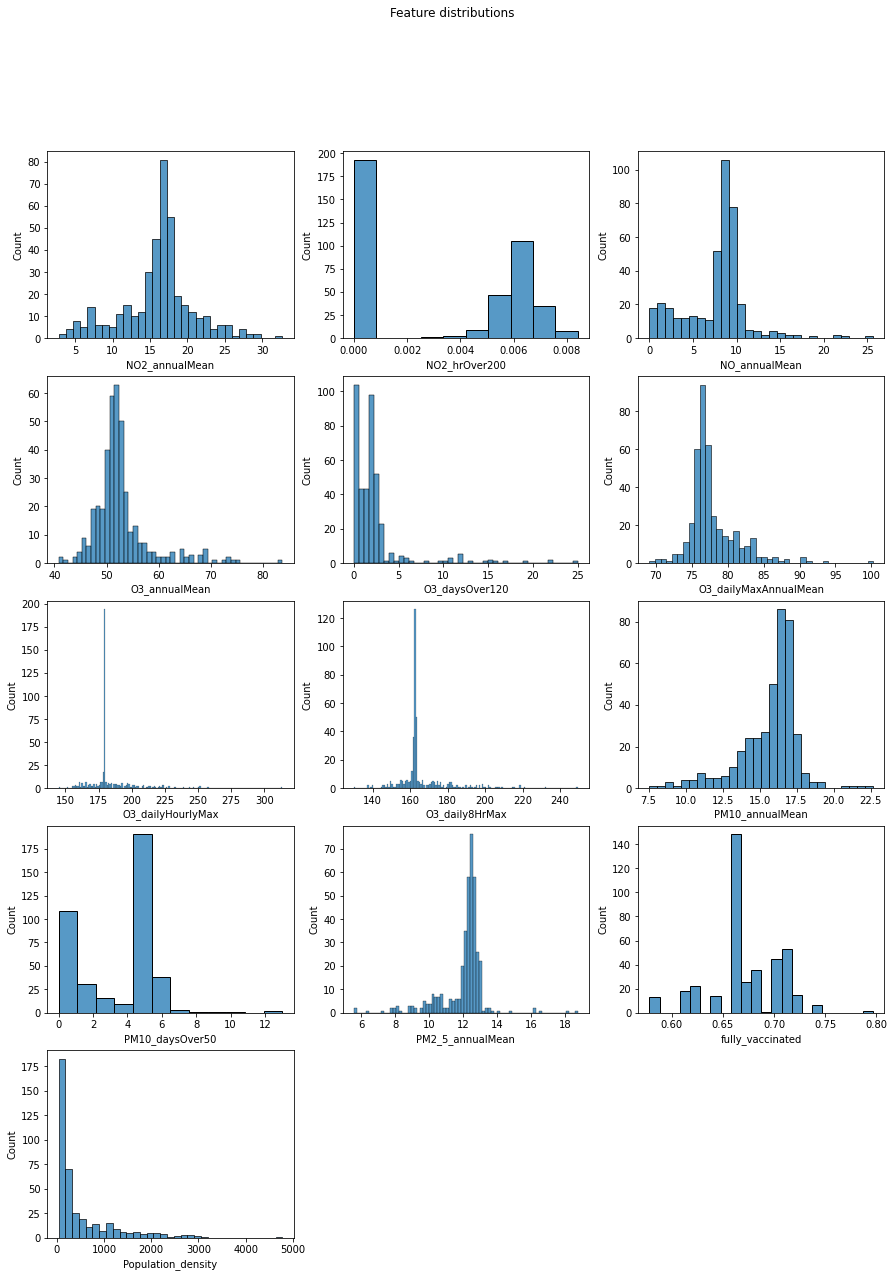

In [11]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

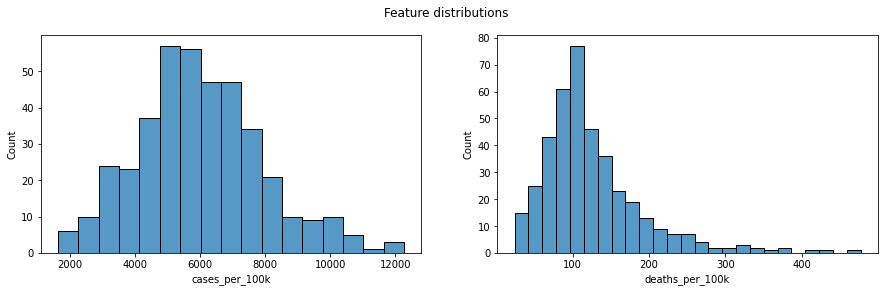

In [12]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(1,2,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

# Visual analysis of feature-target correlation

## Target: deaths per 100k

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

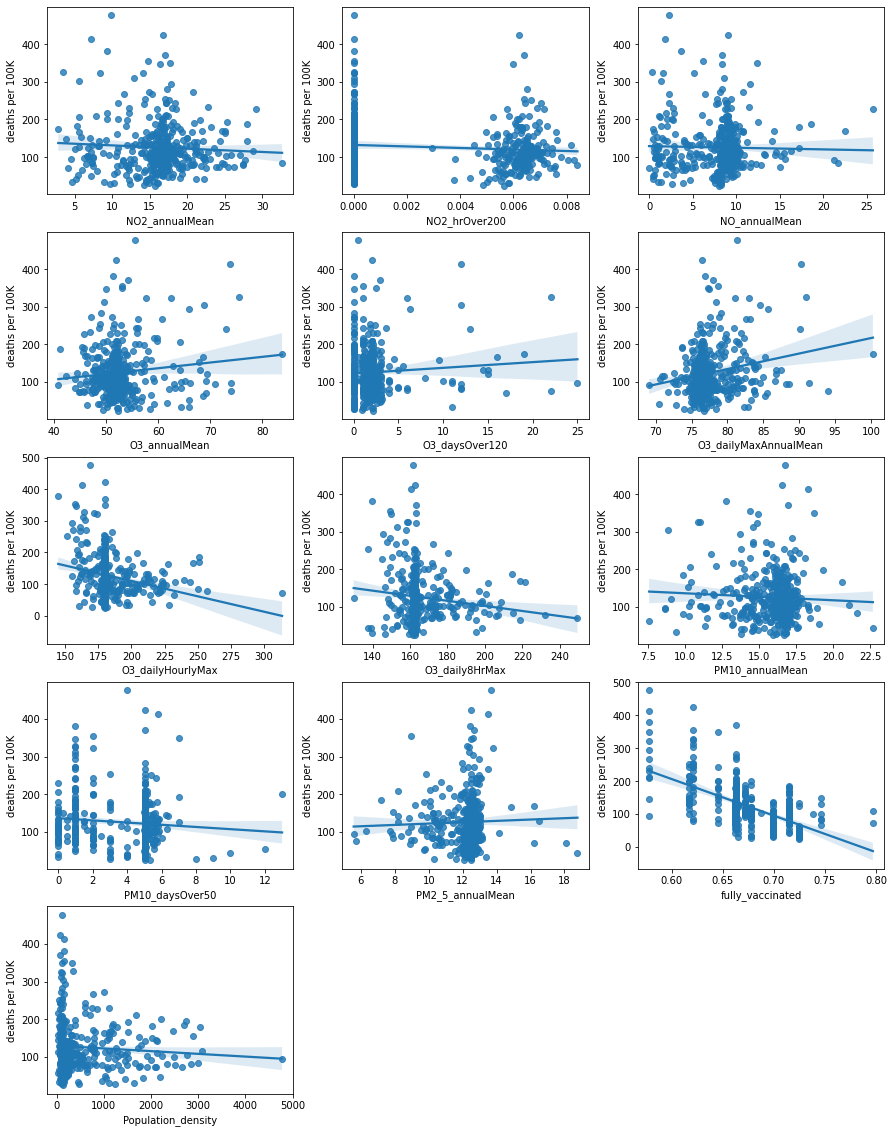

In [13]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.regplot(df_covid_AP_2019[feature], df_covid_AP_2019['deaths_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("deaths per 100K")
    # Global figure methods
plt.show()

## Target: cases per 100k

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

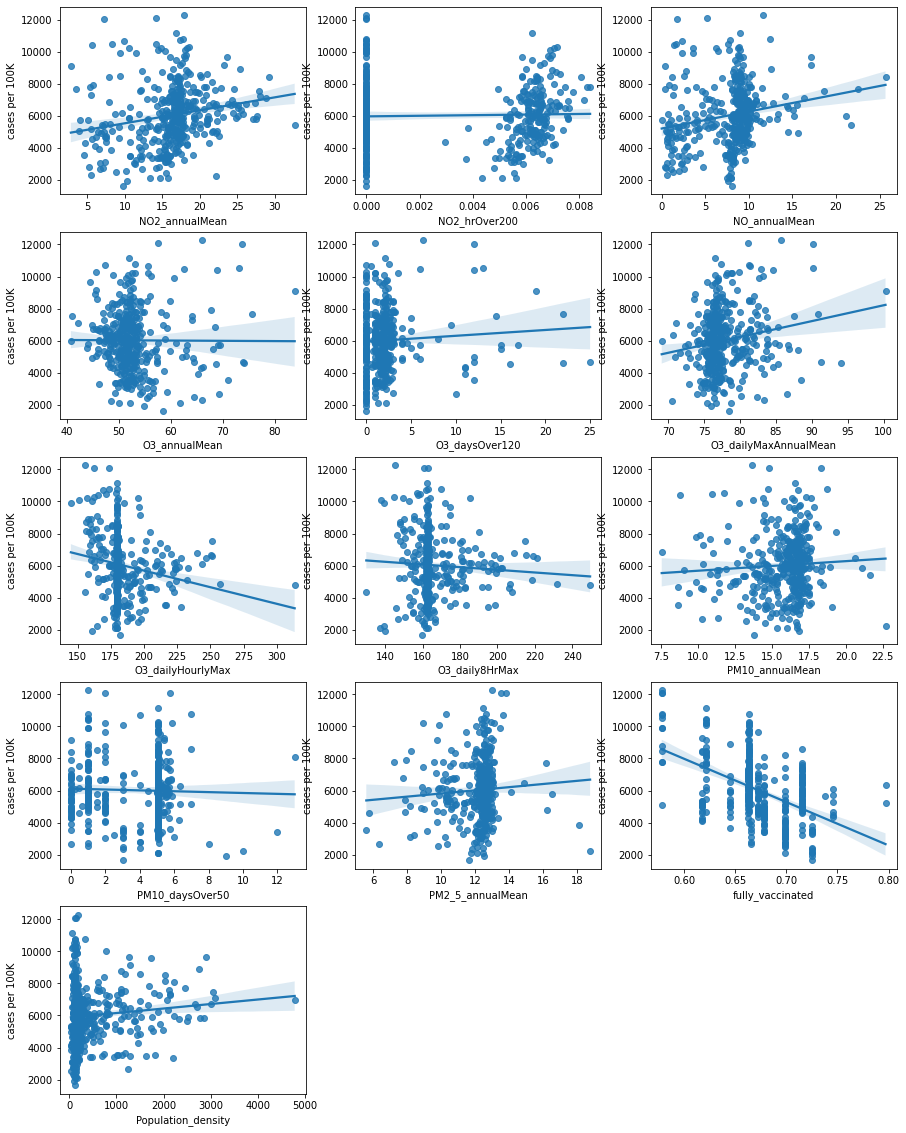

In [14]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.regplot(df_covid_AP_2019[feature], df_covid_AP_2019['cases_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("cases per 100K")
    # Global figure methods
plt.show()

## Correlation plot

<AxesSubplot:>

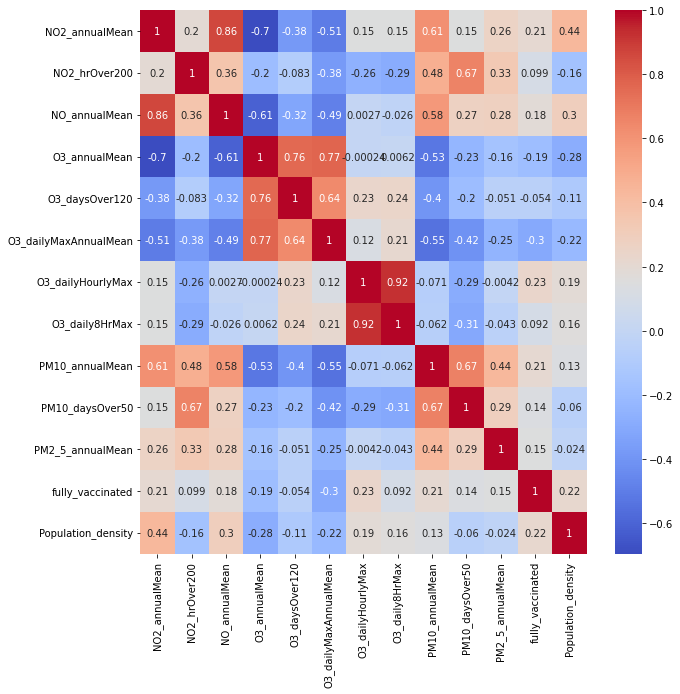

In [15]:
import seaborn as sns
plt.figure(figsize = (10,10))

sns.heatmap(df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean',
       'fully_vaccinated', 'Population_density']].corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [16]:
df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean',
       'fully_vaccinated', 'Population_density']].corr()

,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2_5_annualMean,fully_vaccinated,Population_density
NO2_annualMean,1.000000,0.195598,0.862425,-0.696698,-0.381589,-0.505111,0.147180,0.146795,0.610912,0.151199,0.259602,0.210495,0.436260
NO2_hrOver200,0.195598,1.000000,0.359340,-0.196811,-0.083371,-0.375849,-0.262347,-0.288656,0.482486,0.666506,0.332723,0.098667,-0.164483
NO_annualMean,0.862425,0.359340,1.000000,-0.612523,-0.320973,-0.487763,0.002675,-0.025597,0.581974,0.273089,0.280956,0.178809,0.295168
O3_annualMean,-0.696698,-0.196811,-0.612523,1.000000,0.757495,0.774594,-0.000235,0.006168,-0.527105,-0.234630,-0.156374,-0.188640,-0.284155
O3_daysOver120,-0.381589,-0.083371,-0.320973,0.757495,1.000000,0.639842,0.231933,0.241461,-0.403827,-0.199191,-0.050974,-0.053599,-0.110242
O3_dailyMaxAnnualMean,-0.505111,-0.375849,-0.487763,0.774594,0.639842,1.000000,0.124650,0.212591,-0.546212,-0.416487,-0.250073,-0.300545,-0.217427
O3_dailyHourlyMax,0.147180,-0.262347,0.002675,-0.000235,0.231933,0.124650,1.000000,0.921799,-0.071451,-0.287150,-0.004172,0.231462,0.186172
O3_daily8HrMax,0.146795,-0.288656,-0.025597,0.006168,0.241461,0.212591,0.921799,1.000000,-0.062021,-0.310138,-0.043136,0.092072,0.159191
PM10_annualMean,0.610912,0.482486,0.581974,-0.527105,-0.403827,-0.546212,-0.071451,-0.062021,1.000000,0.674275,0.436387,0.211284,0.132580
PM10_daysOver50,0.151199,0.666506,0.273089,-0.234630,-0.199191,-0.416487,-0.287150,-0.310138,0.674275,1.000000,0.289434,0.138387,-0.060301


## VIF analysis

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [18]:
vif_df = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean',
       'O3_annualMean','O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean',
       'fully_vaccinated', 'Population_density']]

In [19]:
df = pd.DataFrame()
df["vif_index"] = [vif(vif_df.values, i) for i in range(vif_df.shape[1])]
df["features"] = vif_df.columns
df

,vif_index,features
0,78.991483,NO2_annualMean
1,24.161332,NO_annualMean
2,130.300124,O3_annualMean
3,157.349598,O3_daily8HrMax
4,116.704364,PM10_annualMean
5,99.670449,PM2_5_annualMean
6,257.800621,fully_vaccinated
7,2.155531,Population_density


# OLS: deaths per 100k

## Univariate linear regression

In [20]:
import statsmodels.formula.api as smf

### Vaccination status

In [21]:
model = smf.ols(formula = 'deaths_per_100k ~ fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     198.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           6.67e-37
Time:                        15:50:20   Log-Likelihood:                -2172.0
No. Observations:                 400   AIC:                             4348.
Df Residuals:                     398   BIC:                             4356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          873.8201     53.133     16.446      0.000     769.363     978.277
fully_vaccinated -1112.4698     78.899    -14.100      0.000   -1267.580    -957.359
==============================================================================
Omnibus:                       93.260   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.962
Skew:                           1.190   Prob(JB):                     6.94e-46
Kurtosis:                       5.611   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import numpy as np
RMSE = np.sqrt((model.resid**2).mean())
RMSE

55.21204730042802

### Population density

In [23]:
model = smf.ols(formula = 'deaths_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.166
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.142
Time:                        15:50:20   Log-Likelihood:                -2252.0
No. Observations:                 400   AIC:                             4508.
Df Residuals:                     398   BIC:                             4516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            129.4864      4.264     30.364      0.000     121.103     137.870
Population_density    -0.0072      0.005     -1.472      0.142      -0.017       0.002
==============================================================================
Omnibus:                      147.676   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.709
Skew:                           1.697   Prob(JB):                    9.20e-106
Kurtosis:                       7.183   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.42657954044569

### NO2

In [25]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.513
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.219
Time:                        15:50:20   Log-Likelihood:                -2252.3
No. Observations:                 400   AIC:                             4509.
Df Residuals:                     398   BIC:                             4517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        139.6672     11.882     11.755      0.000     116.308     163.026
NO2_annualMean    -0.8718      0.709     -1.230      0.219      -2.265       0.522
==============================================================================
Omnibus:                      146.022   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.285
Skew:                           1.680   Prob(JB):                    1.02e-103
Kurtosis:                       7.143   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.48170578031552

### NO 

In [27]:
model = smf.ols(formula = 'deaths_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2225
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.637
Time:                        15:50:20   Log-Likelihood:                -2253.0
No. Observations:                 400   AIC:                             4510.
Df Residuals:                     398   BIC:                             4518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       129.0280      7.904     16.324      0.000     113.489     144.567
NO_annualMean    -0.4367      0.926     -0.472      0.637      -2.257       1.383
==============================================================================
Omnibus:                      150.545   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.616
Skew:                           1.723   Prob(JB):                    2.66e-110
Kurtosis:                       7.289   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.59091749428922

### Ozon

In [29]:
model = smf.ols(formula = 'deaths_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.893
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0156
Time:                        15:50:20   Log-Likelihood:                -2250.1
No. Observations:                 400   AIC:                             4504.
Df Residuals:                     398   BIC:                             4512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        45.9357     33.014      1.391      0.165     -18.968     110.839
O3_annualMean     1.5107      0.622      2.427      0.016       0.287       2.734
==============================================================================
Omnibus:                      141.073   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.758
Skew:                           1.627   Prob(JB):                     5.90e-98
Kurtosis:                       7.034   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.11480048688462

### PM2.5

In [31]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.471
Time:                        15:50:20   Log-Likelihood:                -2252.8
No. Observations:                 400   AIC:                             4510.
Df Residuals:                     398   BIC:                             4518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          104.1470     30.038      3.467      0.001      45.094     163.200
PM2_5_annualMean     1.7848      2.476      0.721      0.471      -3.083       6.653
==============================================================================
Omnibus:                      150.330   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.425
Skew:                           1.721   Prob(JB):                    4.81e-110
Kurtosis:                       7.285   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.56573118081718

### PM10

In [33]:
model = smf.ols(formula = 'deaths_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.210
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.272
Time:                        15:50:20   Log-Likelihood:                -2252.5
No. Observations:                 400   AIC:                             4509.
Df Residuals:                     398   BIC:                             4517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         154.7858     26.699      5.797      0.000     102.296     207.275
PM10_annualMean    -1.8577      1.689     -1.100      0.272      -5.178       1.463
==============================================================================
Omnibus:                      152.501   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.876
Skew:                           1.734   Prob(JB):                    6.42e-115
Kurtosis:                       7.418   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

67.50731406779678

## Multivariate linear regression

In [35]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     31.51
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.33e-34
Time:                        15:50:20   Log-Likelihood:                -2163.8
No. Observations:                 400   AIC:                             4344.
Df Residuals:                     392   BIC:                             4376.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            755.9933     76.665      9.861      0.000     605.268     906.718
NO2_annualMean        -0.4192      1.368     -0.306      0.759      -3.108       2.270
NO_annualMean          1.9478      1.510      1.290      0.198      -1.021       4.916
O3_annualMean          1.2661      0.721      1.755      0.080      -0.152       2.684
PM10_annualMean        0.8709      1.921      0.453      0.651      -2.905       4.647
PM2_5_annualMean       5.4705      2.257      2.424      0.016       1.033       9.908
fully_vaccinated   -1172.8252     81.738    -14.349      0.000   -1333.525   -1012.125
Population_density     0.0070      0.005      1.516      0.130      -0.002       0.016
==============================================================================
Omnibus:                       91.534   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.338
Skew:                           1.144   Prob(JB):                     1.74e-47
Kurtosis:                       5.772   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

54.08557954353279

# OLS: cases per 100k

## Univariate linear regression

### Vaccination status

In [37]:
model = smf.ols(formula = 'cases_per_100k ~ fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     126.5
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.15e-25
Time:                        15:50:20   Log-Likelihood:                -3538.3
No. Observations:                 400   AIC:                             7081.
Df Residuals:                     398   BIC:                             7089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.418e+04   1617.291     14.952      0.000     2.1e+04    2.74e+04
fully_vaccinated -2.701e+04   2401.549    -11.246      0.000   -3.17e+04   -2.23e+04
==============================================================================
Omnibus:                        9.286   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.798
Skew:                           0.203   Prob(JB):                       0.0334
Kurtosis:                       2.507   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1680.5612938709687

### Population density

In [39]:
model = smf.ols(formula = 'cases_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.040
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0451
Time:                        15:50:20   Log-Likelihood:                -3591.5
No. Observations:                 400   AIC:                             7187.
Df Residuals:                     398   BIC:                             7195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5869.5127    121.397     48.350      0.000    5630.854    6108.172
Population_density     0.2813      0.140      2.010      0.045       0.006       0.556
==============================================================================
Omnibus:                       19.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.482
Skew:                           0.532   Prob(JB):                     2.16e-05
Kurtosis:                       3.397   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1919.4498032770207

### NO2

In [41]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.55
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.71e-05
Time:                        15:50:20   Log-Likelihood:                -3585.4
No. Observations:                 400   AIC:                             7175.
Df Residuals:                     398   BIC:                             7183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4720.2290    332.824     14.182      0.000    4065.917    5374.541
NO2_annualMean    80.7870     19.856      4.069      0.000      41.751     119.823
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.625
Skew:                           0.684   Prob(JB):                     4.10e-09
Kurtosis:                       3.669   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1890.2594304569272

### NO 

In [43]:
model = smf.ols(formula = 'cases_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.78
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.09e-05
Time:                        15:50:20   Log-Likelihood:                -3585.3
No. Observations:                 400   AIC:                             7175.
Df Residuals:                     398   BIC:                             7182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5200.4631    220.989     23.533      0.000    4766.011    5634.916
NO_annualMean   106.0205     25.882      4.096      0.000      55.137     156.904
==============================================================================
Omnibus:                       28.097   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.730
Skew:                           0.626   Prob(JB):                     7.81e-08
Kurtosis:                       3.631   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1889.74456849581

### Ozon

In [45]:
model = smf.ols(formula = 'cases_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009209
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.924
Time:                        15:50:20   Log-Likelihood:                -3593.5
No. Observations:                 400   AIC:                             7191.
Df Residuals:                     398   BIC:                             7199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6108.9032    948.952      6.438      0.000    4243.317    7974.489
O3_annualMean    -1.7166     17.889     -0.096      0.924     -36.885      33.452
==============================================================================
Omnibus:                       14.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.206
Skew:                           0.458   Prob(JB):                     0.000499
Kurtosis:                       3.268   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1929.1457246759655

### PM2.5

In [47]:
model = smf.ols(formula = 'cases_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.947
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.164
Time:                        15:50:21   Log-Likelihood:                -3592.5
No. Observations:                 400   AIC:                             7189.
Df Residuals:                     398   BIC:                             7197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4832.1621    855.569      5.648      0.000    3150.163    6514.161
PM2_5_annualMean    98.4119     70.532      1.395      0.164     -40.249     237.073
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.595
Skew:                           0.437   Prob(JB):                      0.00112
Kurtosis:                       3.230   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1924.4669994225292

### PM10

In [49]:
model = smf.ols(formula = 'cases_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.540
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.215
Time:                        15:50:21   Log-Likelihood:                -3592.7
No. Observations:                 400   AIC:                             7189.
Df Residuals:                     398   BIC:                             7197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5080.7603    761.524      6.672      0.000    3583.649    6577.872
PM10_annualMean    59.7965     48.178      1.241      0.215     -34.918     154.511
==============================================================================
Omnibus:                       15.420   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.121
Skew:                           0.465   Prob(JB):                     0.000316
Kurtosis:                       3.317   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1925.4453544107107

## Multivariate linear regression

In [51]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     34.52
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           2.01e-37
Time:                        15:50:21   Log-Likelihood:                -3497.5
No. Observations:                 400   AIC:                             7011.
Df Residuals:                     392   BIC:                             7043.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.952e+04   2150.816      9.074      0.000    1.53e+04    2.37e+04
NO2_annualMean       109.2102     38.371      2.846      0.005      33.771     184.650
NO_annualMean         73.8043     42.363      1.742      0.082      -9.482     157.090
O3_annualMean         73.8212     20.238      3.648      0.000      34.033     113.609
PM10_annualMean       -8.0574     53.885     -0.150      0.881    -113.996      97.881
PM2_5_annualMean     119.2223     63.325      1.883      0.060      -5.276     243.721
fully_vaccinated   -3.156e+04   2293.153    -13.761      0.000   -3.61e+04    -2.7e+04
Population_density     0.3666      0.130      2.813      0.005       0.110       0.623
==============================================================================
Omnibus:                       10.830   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.939
Skew:                           0.393   Prob(JB):                      0.00421
Kurtosis:                       3.194   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO2_hrOver200 + NO_annualMean + O3_annualMean + O3_daysOver120 + O3_dailyMaxAnnualMean + O3_dailyHourlyMax + O3_daily8HrMax + PM10_annualMean + PM10_daysOver50 + PM2_5_annualMean + fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     24.34
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.22e-42
Time:                        15:50:21   Log-Likelihood:                -3473.8
No. Observations:                 400   AIC:                             6976.
Df Residuals:                     386   BIC:                             7031.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.112e+04   3622.889      3.070      0.002    3998.459    1.82e+04
NO2_annualMean          104.0342     42.347      2.457      0.014      20.774     187.294
NO2_hrOver200           2.97e+04   3.49e+04      0.852      0.395   -3.88e+04    9.82e+04
NO_annualMean            46.0629     44.422      1.037      0.300     -41.277     133.403
O3_annualMean           -44.7561     34.096     -1.313      0.190    -111.794      22.281
O3_daysOver120           77.2507     41.161      1.877      0.061      -3.676     158.178
O3_dailyMaxAnnualMean   172.3270     40.661      4.238      0.000      92.381     252.273
O3_dailyHourlyMax       -43.1331     12.251     -3.521      0.000     -67.220     -19.046
O3_daily8HrMax           28.1393     16.019      1.757      0.080      -3.357      59.635
PM10_annualMean          11.5343     75.973      0.152      0.879    -137.838     160.907
PM10_daysOver50         -12.6415     61.778     -0.205      0.838    -134.104     108.821
PM2_5_annualMean        149.9173     61.704      2.430      0.016      28.600     271.234
fully_vaccinated      -2.583e+04   2406.054    -10.736      0.000   -3.06e+04   -2.11e+04
Population_density        0.4534      0.128      3.536      0.000       0.201       0.705
==============================================================================
Omnibus:                        7.039   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.922
Skew:                           0.317   Prob(JB):                       0.0314
Kurtosis:                       3.117   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# df = pd.DataFrame()
# df["vif_index"] = [vif(X.values, i) for i in range(X.shape[1])]
# df["features"] = X.columns
# df

NameError: name 'X' is not defined

In [ ]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

# Feature and target definition

In [2]:
X = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'fully_vaccinated', 'Population_density']]
y_mort = df_covid_AP_2019[['deaths_per_100k']]
y_cases = df_covid_AP_2019[['cases_per_100k']]

NameError: name 'df_covid_AP_2019' is not defined

# Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


## Deaths per 100k

In [57]:
linreg = LinearRegression().fit(X,y_mort)
linreg.score(X, y_mort)

0.3600537234505651

## Cases per 100k

In [58]:
linreg = LinearRegression()
cv_results = cross_validate(linreg, X, y_cases, cv=5, 
                            scoring='r2'
                            )
linreg = linreg.fit(X,y_cases)
print(linreg.score(X, y_cases))

0.38135733062186505


# Lasso, Ridge, LinReg, ElasticNet

## Cases per 100k

In [59]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet(alpha=0.2)
    
cv_results_linreg = cross_validate(linreg, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_ridge = cross_validate(ridge, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_lasso = cross_validate(lasso, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_elastic = cross_validate(elastic, X, y_cases, cv=5, 
                            scoring='r2'
                            )

linreg = linreg.fit(X, y_cases)
ridge = ridge.fit(X, y_cases)
lasso = lasso.fit(X, y_cases)
elastic = elastic.fit(X, y_cases)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_cases), 'R2 generalize: ', cv_results_linreg['test_score'].mean())
print('R2 Ridge: ', ridge.score(X,y_cases), 'R2 generalize: ', cv_results_ridge['test_score'].mean())
print('R2 Lasso: ', lasso.score(X,y_cases), 'R2 generalize: ', cv_results_lasso['test_score'].mean())
print('R2 Elastic: ', elastic.score(X,y_cases), 'R2 generalize: ', cv_results_elastic['test_score'].mean())

#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.38135733062186505 R2 generalize:  0.31773892234984896
R2 Ridge:  0.23859111183314374 R2 generalize:  0.16987462260064562
R2 Lasso:  0.381116381258912 R2 generalize:  0.31857544118863823
R2 Elastic:  0.08905198947566195 R2 generalize:  0.038164601276205204


,coef_linreg,coef_ridge,coef_lasso,coef_elastic
NO2_annualMean,109.210241,113.253347,109.223693,112.824094
NO_annualMean,73.804267,73.378800,109.223693,112.824094
O3_annualMean,73.821169,83.703191,109.223693,112.824094
PM10_annualMean,-8.057359,-54.036785,109.223693,112.824094
PM2_5_annualMean,119.222257,65.664393,109.223693,112.824094
fully_vaccinated,-31555.109344,-9744.445661,109.223693,112.824094
Population_density,0.366648,0.144754,109.223693,112.824094


## Deaths per 100k

In [85]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet(alpha=0.2)
    
cv_results_linreg = cross_validate(linreg, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_ridge = cross_validate(ridge, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_lasso = cross_validate(lasso, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_elastic = cross_validate(elastic, X, y_mort, cv=5, 
                            scoring='r2'
                            )

linreg = linreg.fit(X, y_mort)
ridge = ridge.fit(X, y_mort)
lasso = lasso.fit(X, y_mort)
elastic = elastic.fit(X, y_mort)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_mort), 'R2 generalize: ', cv_results_linreg['test_score'].mean())
print('R2 Ridge: ', ridge.score(X,y_mort), 'R2 generalize: ', cv_results_ridge['test_score'].mean())
print('R2 Lasso: ', lasso.score(X,y_mort), 'R2 generalize: ', cv_results_lasso['test_score'].mean())
print('R2 Elastic: ', elastic.score(X,y_mort), 'R2 generalize: ', cv_results_elastic['test_score'].mean())

#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.3600537234505651 R2 generalize:  0.2961826345388756
R2 Ridge:  0.19947864703218843 R2 generalize:  0.10381468103650911
R2 Lasso:  0.163735753666441 R2 generalize:  0.08776063828985581
R2 Elastic:  0.03073441093315865 R2 generalize:  -0.05449658333396314


,coef_linreg,coef_ridge,coef_lasso,coef_elastic
NO2_annualMean,-0.419195,-0.266120,-0.0,-0.143591
NO_annualMean,1.947788,1.930516,-0.0,-0.143591
O3_annualMean,1.266076,1.634097,-0.0,-0.143591
PM10_annualMean,0.870857,-0.839717,-0.0,-0.143591
PM2_5_annualMean,5.470494,3.478480,-0.0,-0.143591
fully_vaccinated,-1172.825211,-362.172397,-0.0,-0.143591
Population_density,0.007043,-0.001209,-0.0,-0.143591


# KNN

## Cases per 100k

In [82]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
cv_results_neigh = cross_validate(neigh, X, y_cases, cv=5, 
                            scoring='r2'
                            )
neigh.fit(X, y_cases)
print(neigh.score(X, y_cases))
print(cv_results_neigh['test_score'].mean())

0.5451717377800682
-0.5866096636585558


## Deaths per 100k

In [83]:
# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
cv_results_neigh = cross_validate(neigh, X, y_mort, cv=5, 
                            scoring='r2'
                            )
neigh.fit(X, y_mort)
print(neigh.score(X, y_mort))
print(cv_results_neigh['test_score'].mean())

0.5709800776448009
-0.7487236824181579


# Support Vector Regression

## deaths per 100k

In [79]:
from sklearn.svm import SVR

# Instanciate model
SVR = SVR()
cv_results_SVR = cross_validate(neigh, X, y_mort, cv=5, 
                            scoring='r2'
                            )
SVR.fit(X, y_mort)
print(SVR.score(X, y_mort))
print(cv_results_SVR['test_score'].mean())


-0.05358572189204813
-0.7487236824181579


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## cases per 100k

In [67]:
from sklearn.svm import SVR

# Instanciate model
SVR = SVR()
cv_results_SVR = cross_validate(neigh, X, y_cases, cv=5, 
                            scoring='r2'
                            )
SVR.fit(X, y_cases)
print(SVR.score(X, y_cases))
print(cv_results_SVR['test_score'].mean())

-0.004985156118531231
-0.5866096636585558


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# AdaBoost, RandomForestRegressor, XGBoost


## Cases per 100k

In [70]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

cv_results_adaboost = cross_validate(adaboost, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_forest = cross_validate(forest, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_xgbreg = cross_validate(xgbreg, X, y_cases, cv=5, 
                            scoring='r2'
                            )
adaboost.fit(X,y_cases)
forest.fit(X,y_cases)
xgbreg.fit(X,y_cases)

print('R2 adaboost: ', adaboost.score(X,y_cases), cv_results_adaboost['test_score'].mean())
print('R2 RandomForest: ', forest.score(X,y_cases), cv_results_forest['test_score'].mean())
print('R2 XGBoost: ', xgbreg.score(X,y_cases), cv_results_xgbreg['test_score'].mean())


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollutio

R2 adaboost:  0.5986691671140063 0.42724713730594077
R2 RandomForest:  0.9322328125983681 0.4965290414939719
R2 XGBoost:  0.9996766904388145 0.43056823270108674


## Deaths per 100k

In [78]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

cv_results_adaboost = cross_validate(adaboost, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_forest = cross_validate(forest, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_xgbreg = cross_validate(xgbreg, X, y_mort, cv=5, 
                            scoring='r2'
                            )

adaboost.fit(X,y_mort)
forest.fit(X,y_mort)
xgbreg.fit(X,y_mort)

print('R2 adaboost: ', adaboost.score(X,y_mort), cv_results_adaboost['test_score'].mean())
print('R2 RandomForest: ', forest.score(X,y_mort), cv_results_forest['test_score'].mean())
print('R2 XGBoost: ', xgbreg.score(X,y_mort), cv_results_xgbreg['test_score'].mean())

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A colu

R2 adaboost:  0.575536471495119 0.28745666997922087
R2 RandomForest:  0.916404782211554 0.33176468367051737
R2 XGBoost:  0.9998049137236446 0.24692568174787408


# HeatMap of R-squared

In [92]:

data=[[0.38135733062186505, 0.31773892234984896], [0.23859111183314374, 0.16987462260064562], [0.381116381258912, 0.31857544118863823], [0.0834389651082641, 0.03568911068377545], [0.21398562679758482, -0.19639572745747108], [-0.004985156118531231, -0.022096281981379206], [0.593320607476385, 0.43417198326226025], [0.8846719180164109, 0.49686269443897535], [0.9996766904388145, 0.43056823270108674]]

fig = px.imshow(data,
                labels=dict(color="R-squared"),
                x=['Model', 'Generalization'],
                y=['Linear Regression', 'Lasso', 'Ridge','Elastic Net','K-Nearest Neighbours','Support Vector Regression','AdaBoost','Random Forest Regressor','XGBoost']
               )
fig.update_xaxes(side="top")
fig.show()

In [89]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.medals_wide(indexed=True)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Medals included:"),
    dcc.Checklist(
        id='medals',
        options=[{'label': x, 'value': x} 
                 for x in df.columns],
        value=df.columns.tolist(),
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("medals", "value")])
def filter_heatmap(cols):
    fig = px.imshow(df[cols])
    return fig

app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use